In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷

In [2]:
df_train = pd.read_csv("../data/df_train_004.csv")
df_test = pd.read_csv("../data/df_test_004.csv")

df_train['target'] = df_train['사망자수']*10 + df_train['중상자수']*5 + df_train['경상자수']*3 + df_train['부상자수']
df_train.drop(columns = ['사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)

In [3]:
X = df_train.drop(columns = 'target',axis=1)
y = df_train['target']

In [4]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

# 기본 모델 작성

In [16]:
model = model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[33]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [17]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
    loss = tf.keras.losses.Huber(),
    metrics = [
        tf.keras.metrics.MeanSquaredError()
    ]
)

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=20)

Epoch 1/20
867/867 [==============================] - 3s 3ms/step - loss: 1.8305 - mean_squared_error: 12.5068 - val_loss: 1.8227 - val_mean_squared_error: 12.0356
Epoch 2/20
867/867 [==============================] - 2s 3ms/step - loss: 1.7222 - mean_squared_error: 11.7740 - val_loss: 1.6868 - val_mean_squared_error: 12.7525
Epoch 3/20
867/867 [==============================] - 3s 3ms/step - loss: 1.6824 - mean_squared_error: 11.5057 - val_loss: 1.6777 - val_mean_squared_error: 11.4408
Epoch 4/20
867/867 [==============================] - 2s 3ms/step - loss: 1.6560 - mean_squared_error: 11.3008 - val_loss: 1.6157 - val_mean_squared_error: 12.0047
Epoch 5/20
867/867 [==============================] - 3s 3ms/step - loss: 1.6381 - mean_squared_error: 11.1637 - val_loss: 1.6624 - val_mean_squared_error: 12.9221
Epoch 6/20
867/867 [==============================] - 3s 3ms/step - loss: 1.6252 - mean_squared_error: 11.0658 - val_loss: 1.6294 - val_mean_squared_error: 11.0796
Epoch 7/20
867/8

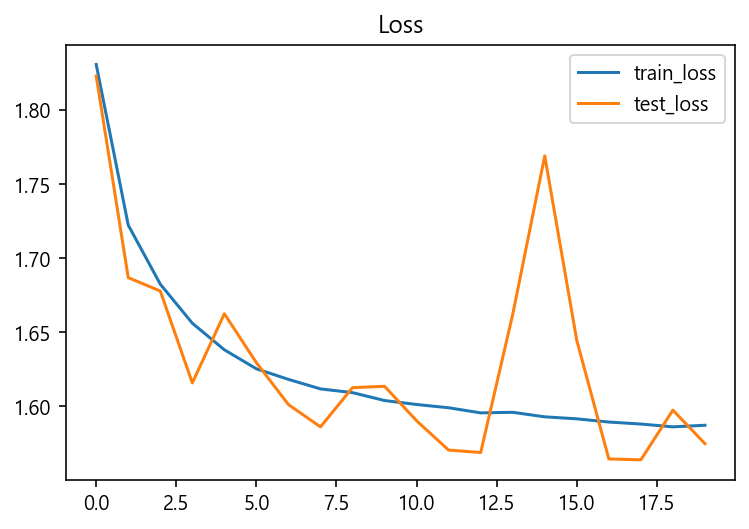

In [22]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.title('Loss')
plt.legend()
plt.show()

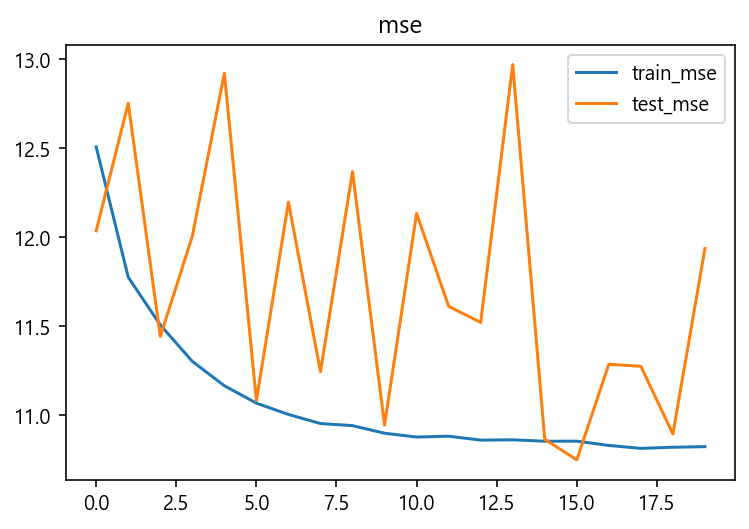

In [20]:
plt.plot(history.history['mean_squared_error'], label='train_mse')
plt.plot(history.history['val_mean_squared_error'], label='test_mse')
plt.title('mse')
plt.legend()
plt.show()

# model A,B,C 비교

In [28]:
model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[33], activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [29]:
model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[33]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1)
])

In [30]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[33]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(1)
])

In [31]:
model_a.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.Huber(), metrics=['mse'])
model_b.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.Huber(), metrics=['mse'])
model_c.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.Huber(), metrics=['mse'])

In [32]:
history_a = model_a.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)
history_b = model_b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)
history_c = model_c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
867/867 [==============================] - 4s 3ms/step - loss: 2.0545 - mse: 14.5036 - val_loss: 1.5878 - val_mse: 11.8640
Epoch 2/20
867/867 [==============================] - 3s 3ms/step - loss: 1.5898 - mse: 10.7716 - val_loss: 1.5628 - val_mse: 11.5670
Epoch 3/20
867/867 [==============================] - 3s 3ms/step - loss: 1.5806 - mse: 10.7724 - val_loss: 1.5587 - val_mse: 11.3031
Epoch 4/20
867/867 [==============================] - 3s 3ms/step - loss: 1.5781 - mse: 10.7513 - val_loss: 1.5591 - val_mse: 11.2477
Epoch 5/20
867/867 [==============================] - 3s 3ms/step - loss: 1.5764 - mse: 10.7291 - val_loss: 1.5634 - val_mse: 11.2299
Epoch 6/20
867/867 [==============================] - 2s 3ms/step - loss: 1.5745 - mse: 10.7358 - val_loss: 1.5592 - val_mse: 11.4775
Epoch 7/20
867/867 [==============================] - 3s 3ms/step - loss: 1.5748 - mse: 10.7452 - val_loss: 1.5581 - val_mse: 11.3230
Epoch 8/20
867/867 [==============================] - 3s 3ms/s

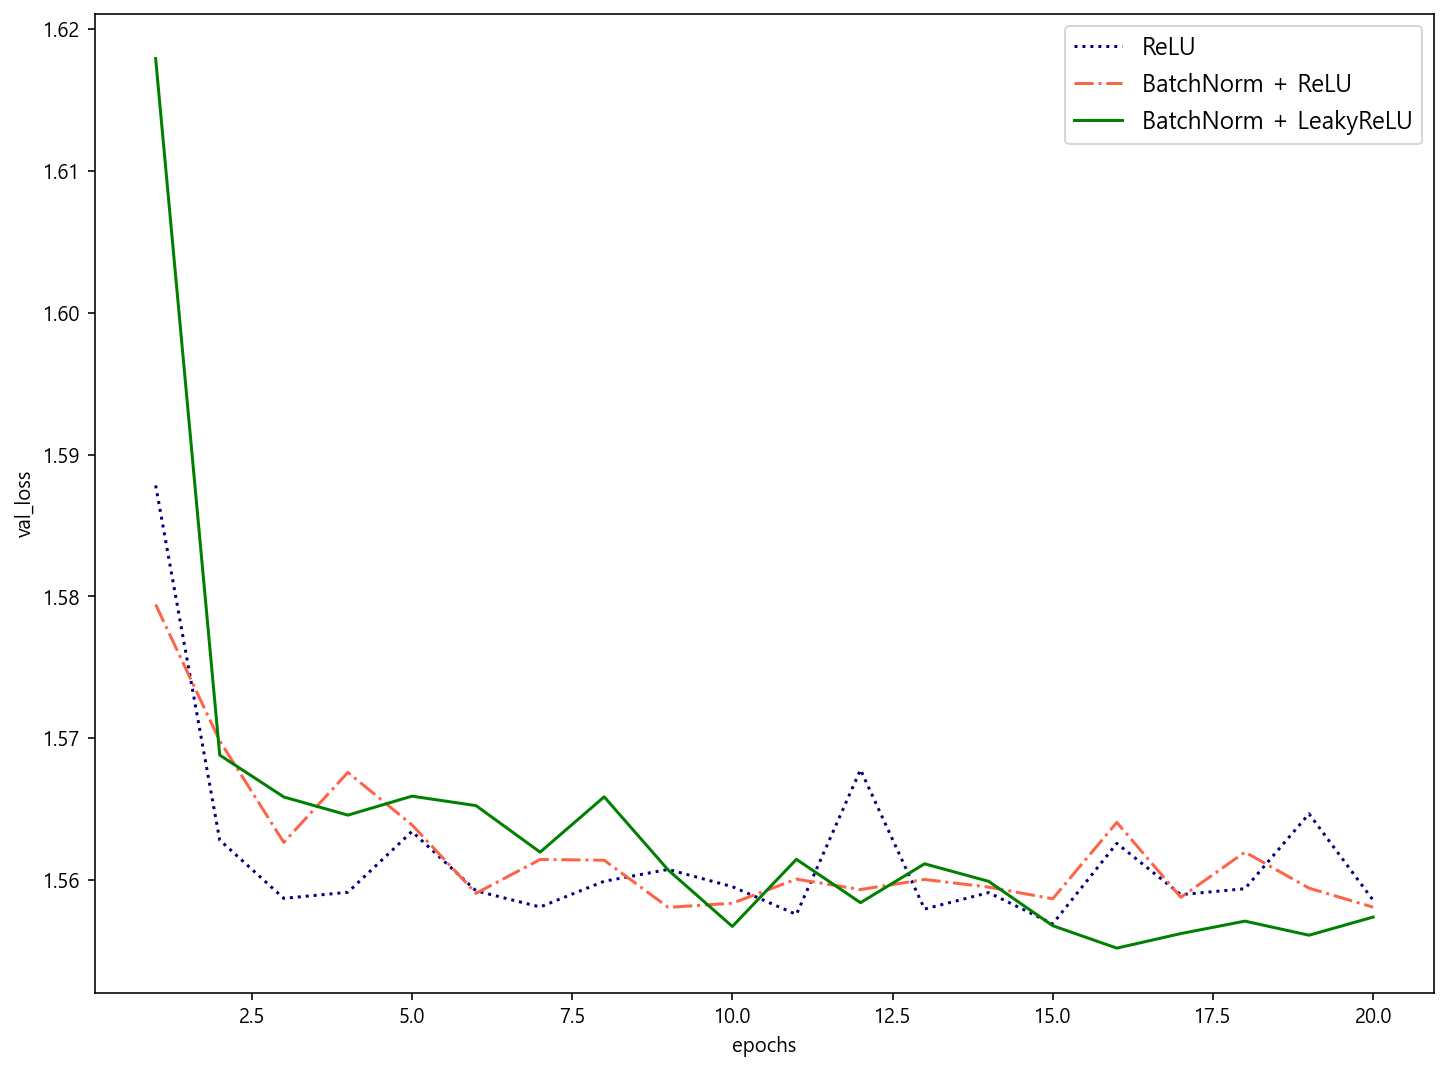

In [34]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,21), history_a.history['val_loss'], color='navy',linestyle=':')
plt.plot(np.arange(1,21), history_b.history['val_loss'], color='tomato',linestyle='-.')
plt.plot(np.arange(1,21), history_c.history['val_loss'], color='green',linestyle='-')

plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'BatchNorm + LeakyReLU'], fontsize=12)
plt.show()

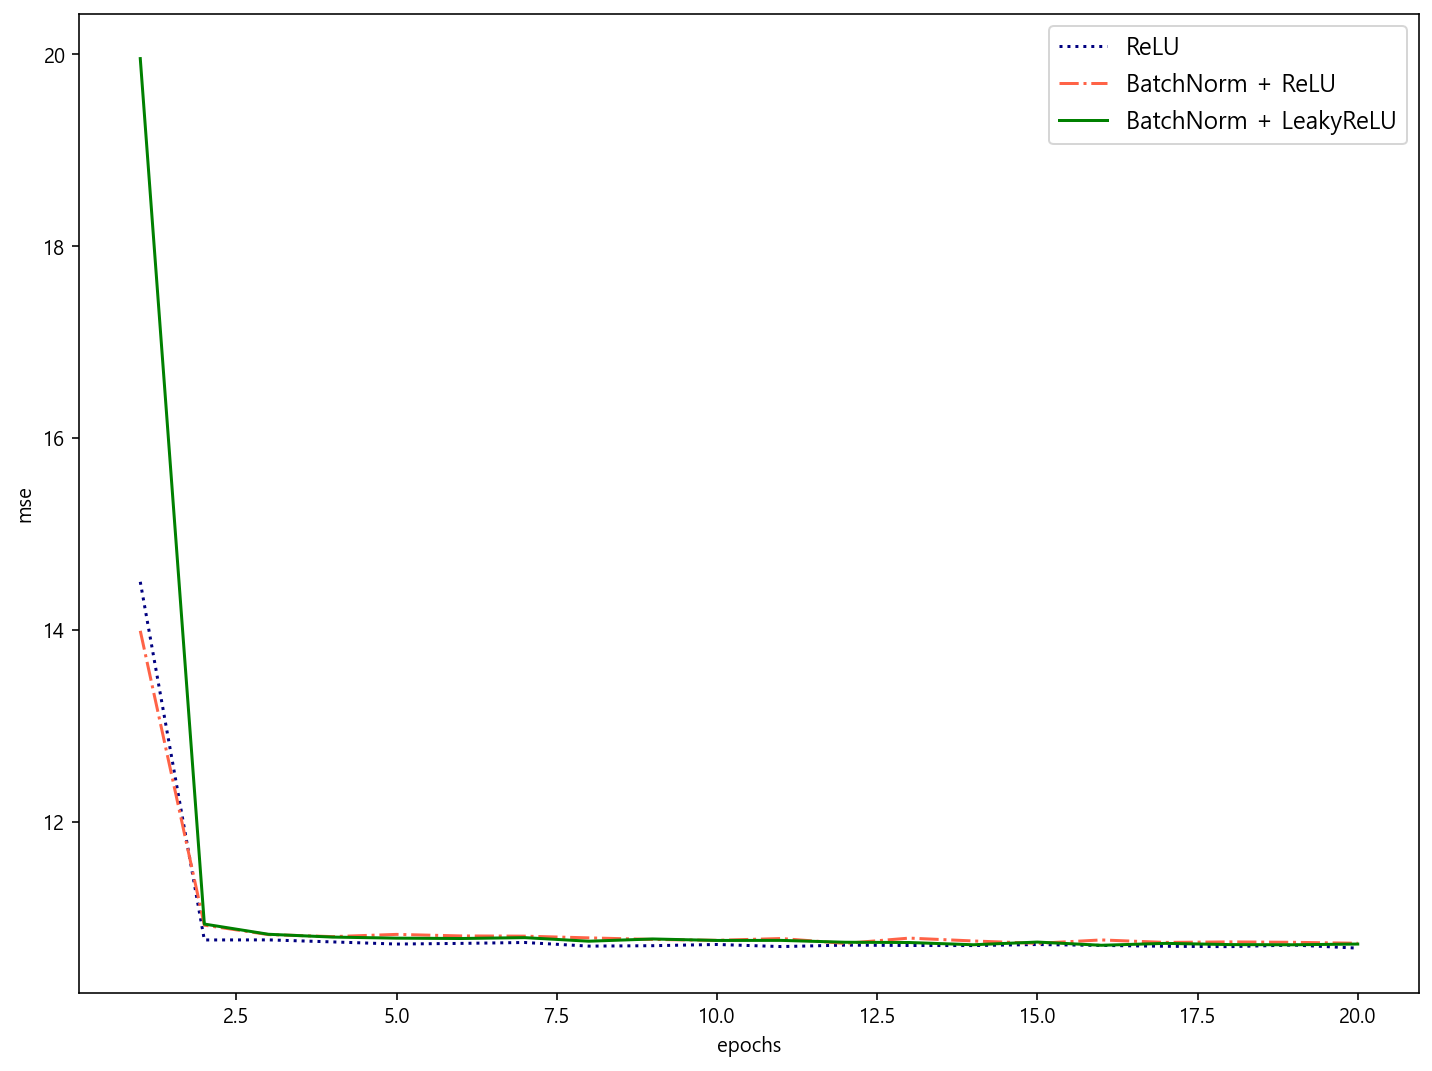

In [35]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,21), history_a.history['mse'], color='navy',linestyle=':')
plt.plot(np.arange(1,21), history_b.history['mse'], color='tomato',linestyle='-.')
plt.plot(np.arange(1,21), history_c.history['mse'], color='green',linestyle='-')

plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'BatchNorm + LeakyReLU'], fontsize=12)
plt.show()

# 제출

In [36]:
model_c.save('../model/005_Batch_Leaky-model.h5')

In [37]:
sub_file = pd.read_csv("../data/sample_submission.csv")

In [38]:
sub_file['ECLO'] = model_c.predict(df_test)
sub_file['ECLO'] = round(sub_file['ECLO'])

343/343 [==============================] - 1s 2ms/step


In [39]:
sub_file.to_csv("../data/sub_file/009tf_Huber_round.csv", index=False)